# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



Running this project require the following imports 

In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
#from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [2]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0,centers=[]):
    color = ['b','r','g','c','m','y','k','#00EEEE','#A9A9A9','#FF8C00','#68228B']
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km==i,0],X[km==i,1],c = color[i],alpha = alpha,s=s)
            if centers!=[]:
                 plt.scatter(centers[i][0],centers[i][1],c = color[i], marker = 'x', s = 100)
           

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



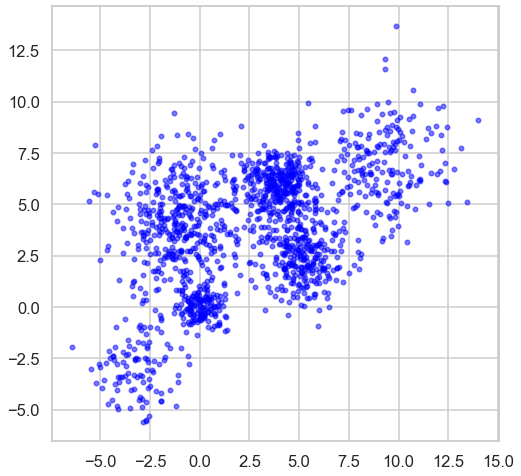

In [3]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [4]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(Multi_blob_Data)
kmeans.labels_

array([0, 0, 0, ..., 1, 1, 1])

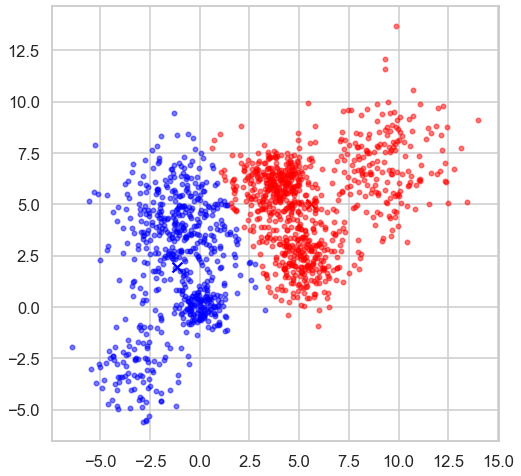

In [5]:
display_cluster(Multi_blob_Data,kmeans.labels_,2,kmeans.cluster_centers_)

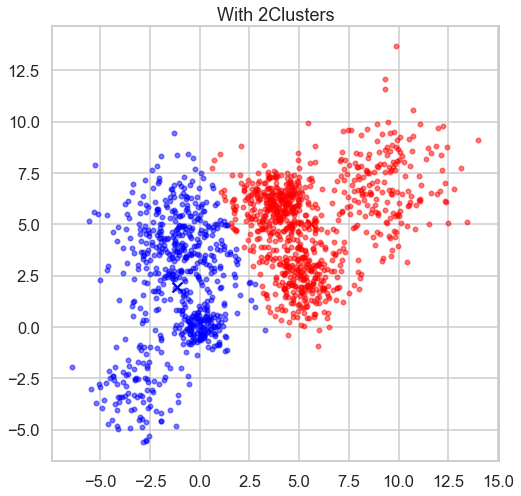

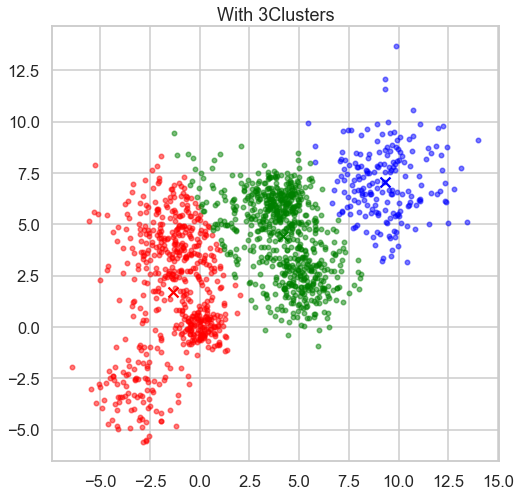

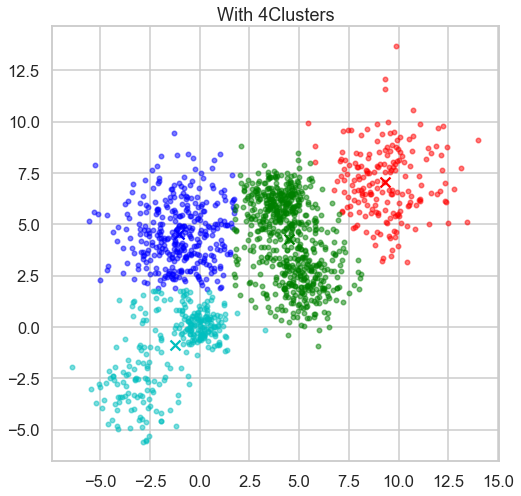

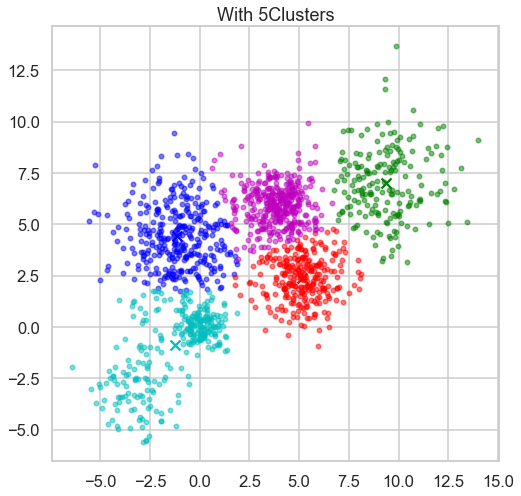

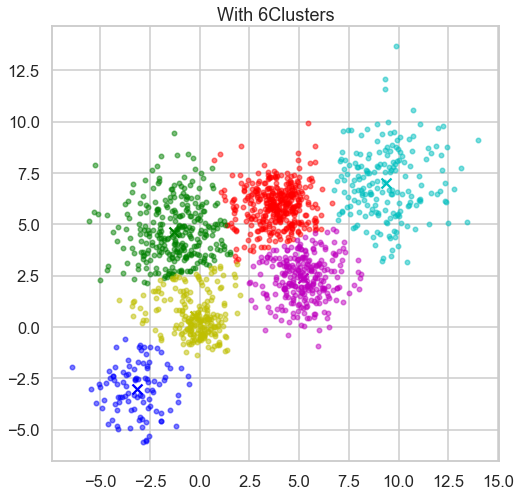

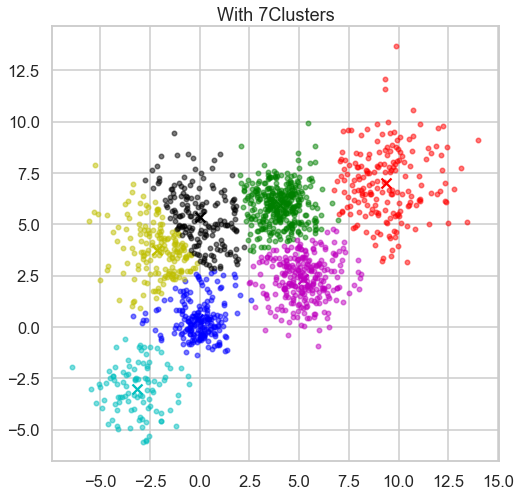

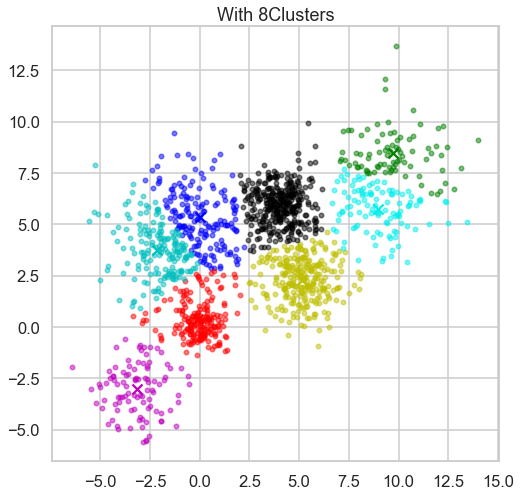

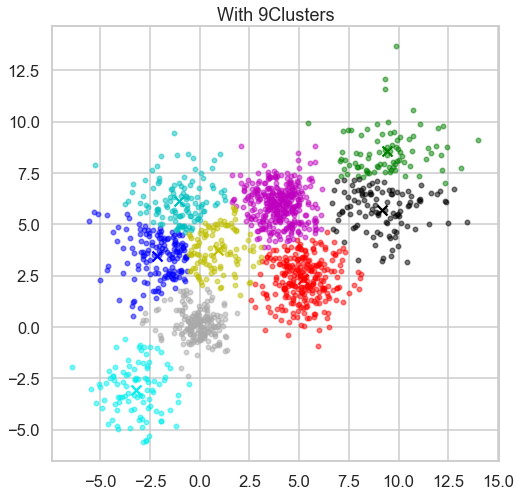

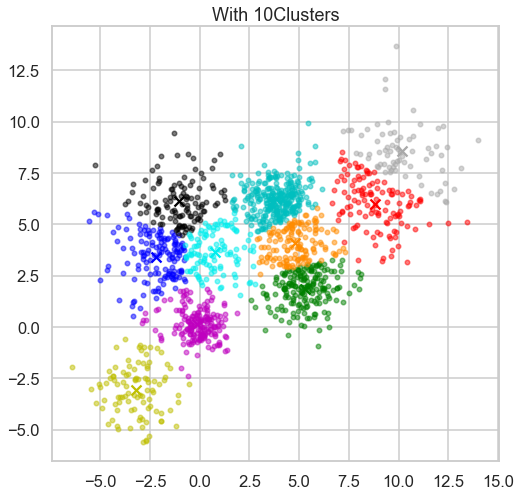

In [6]:
#looping on different K
distortion=[]
silhouette=[]
for i in range(2,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0).fit(Multi_blob_Data)
    display_cluster(Multi_blob_Data,kmeans.labels_,i,kmeans.cluster_centers_)
    s= "With "+str(i)+"Clusters"
    plt.title(s)
    plt.show()
    distortion.append(kmeans.inertia_)
    silhouette.append(silhouette_score(Multi_blob_Data, kmeans.labels_, metric='euclidean')) 

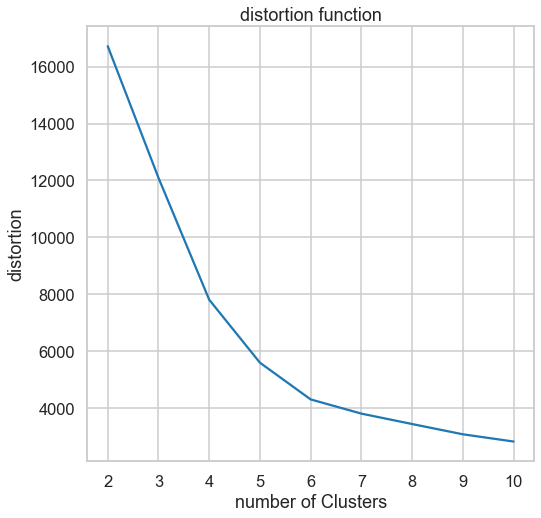

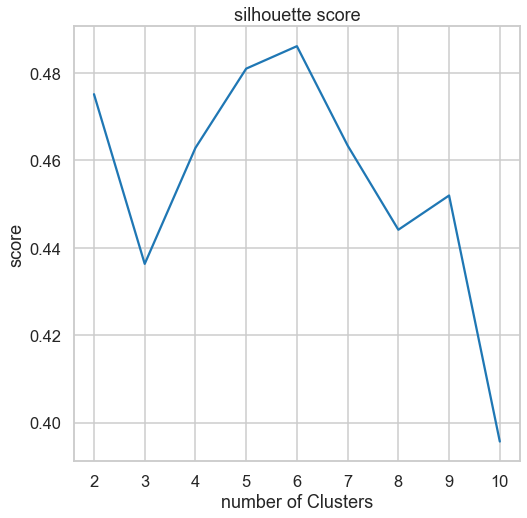

In [7]:
#plotting Distortion and silhouette
plt.plot([2,3,4,5,6,7,8,9,10],distortion)
plt.title('distortion function')
plt.xlabel('number of Clusters')
plt.ylabel('distortion')
plt.show()

plt.plot([2,3,4,5,6,7,8,9,10],silhouette)
plt.title('silhouette score')
plt.xlabel('number of Clusters')
plt.ylabel('score')
plt.show()


In [8]:
#choosing best silhouette
Kmeans_silhouette= silhouette[4]
Kmeans_silhouette

0.48614459735646176

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(model):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            #     Values less than n_samples correspond to leaves of the tree which are the original samples.
            if child_idx < n_samples:
                current_count += 1  # leaf node
            #     A node i greater than or equal to n_samples is a non-leaf node and has children children_[i - n_samples]    
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix)

In [74]:
from sklearn.cluster import AgglomerativeClustering

def dendo_plot(data, a, l):
    aggloclust=AgglomerativeClustering(affinity=a,
              linkage=l,compute_distances=True).fit(data)
    plot_dendrogram(aggloclust)
    s= "Dendogram\nWith affinity: "+a+"\nWith linkage: "+l
    plt.title(s)
    plt.show()
    return aggloclust.distances_

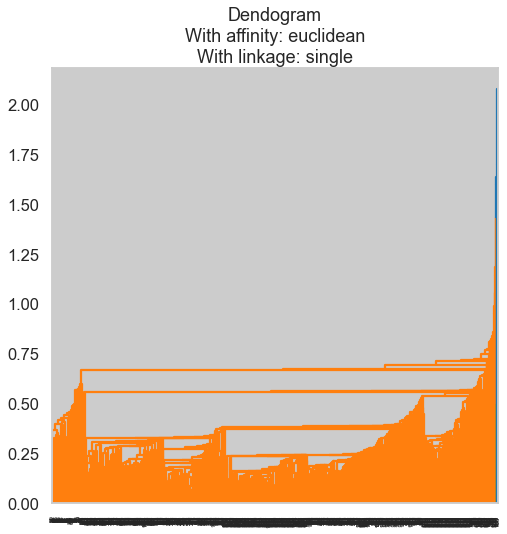

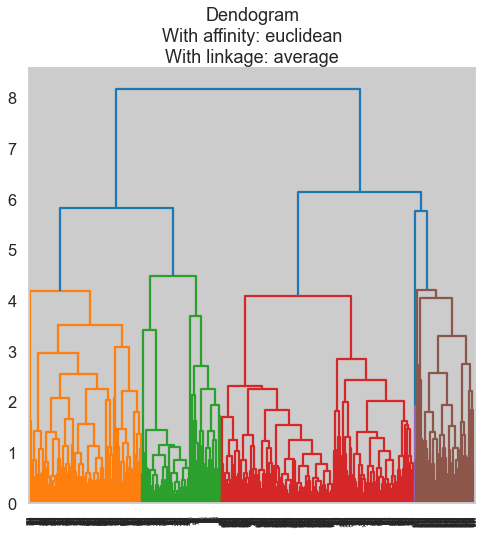

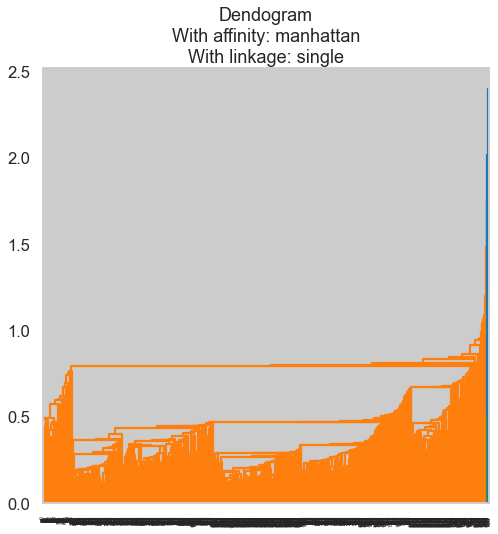

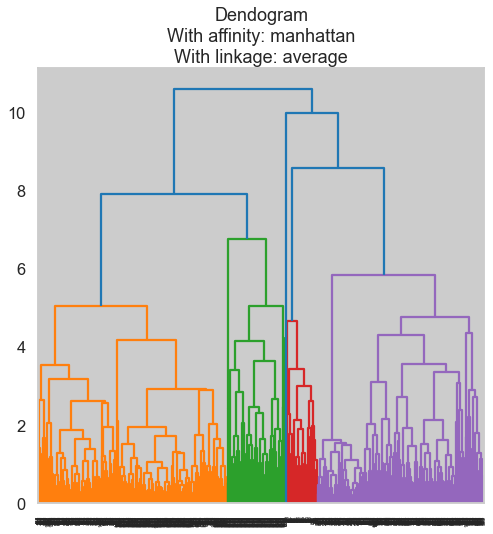

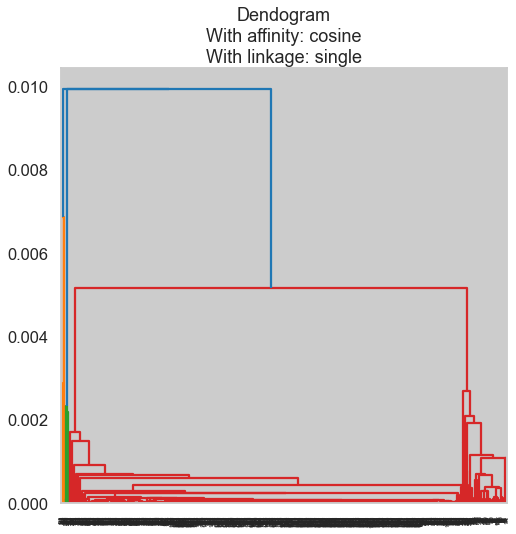

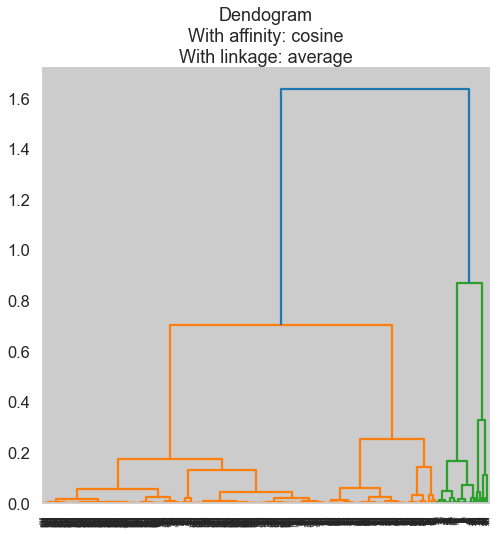

In [22]:

affinity=['euclidean','manhattan','cosine']
linkage=['single','average']
distance_threshold=[1.5,1.6]



#ploting dendogram

for a in affinity:
    for l in linkage:
        dendo_plot(Multi_blob_Data,a,l)


In [78]:
#Clustering and getting Scores
def HierClustering(data,a,l,d):
    aggloclust=AgglomerativeClustering(affinity=a,
             linkage=l, distance_threshold=d,n_clusters=None).fit(data)
    
    #display_cluster(Multi_blob_Data,aggloclust.labels_,aggloclust.n_clusters_)
   # s= "With affinity: "+a+"\nWith linkage: "+l+"\nWith distance: "+str(d)
   # plt.title(s)
   # plt.show()
    labels=aggloclust.labels_
    return labels
        
    

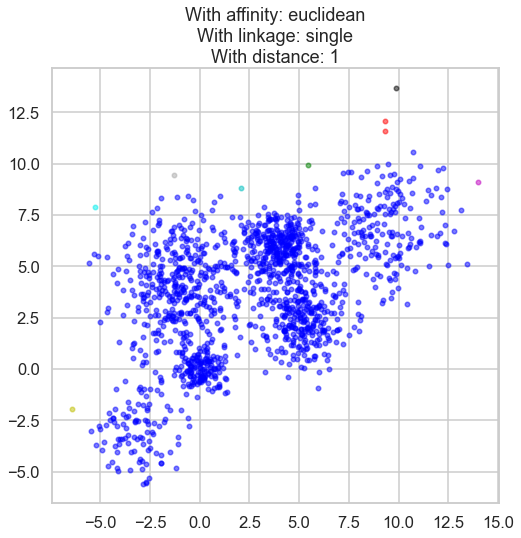

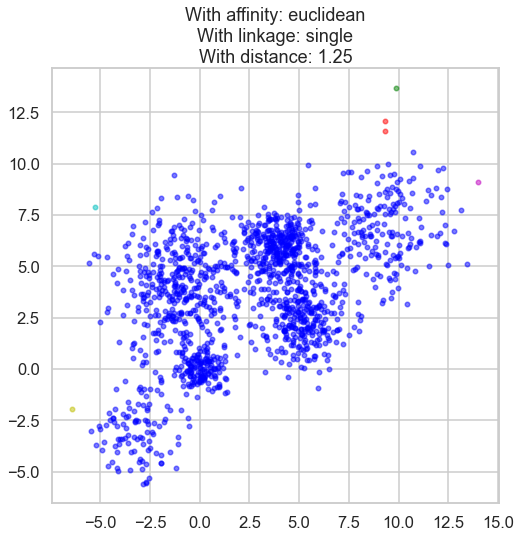

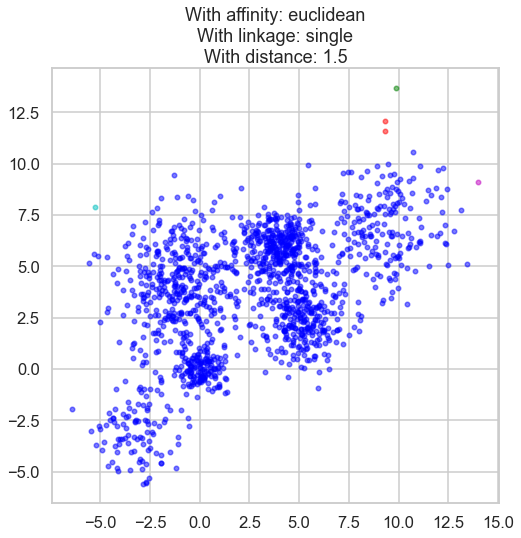

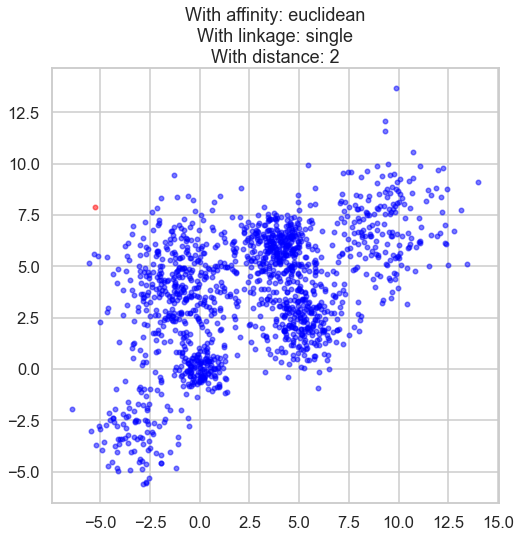

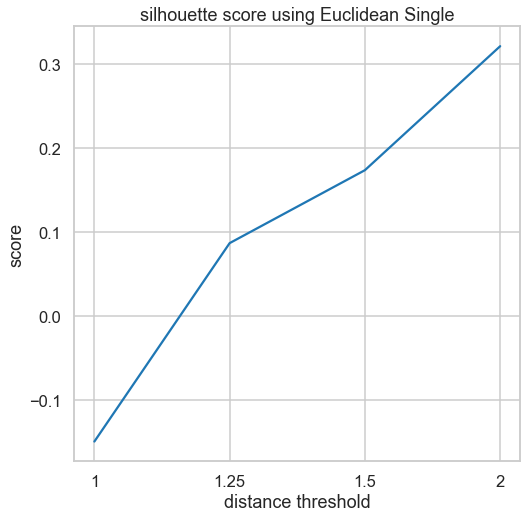

In [40]:
#Euclidean and Single trials
distance=[1,1.25,1.5,2]
silhouette_hier={}
for d in distance:
    labels=HierClustering(Multi_blob_Data,"euclidean","single",d)
    key= str(d)
    silhouette_hier[key]=silhouette_score(Multi_blob_Data, labels, metric='euclidean')

myList = silhouette_hier.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
s= "silhouette score using Euclidean Single"
plt.title(s)
plt.xlabel("distance threshold")
plt.ylabel("score")
plt.show()

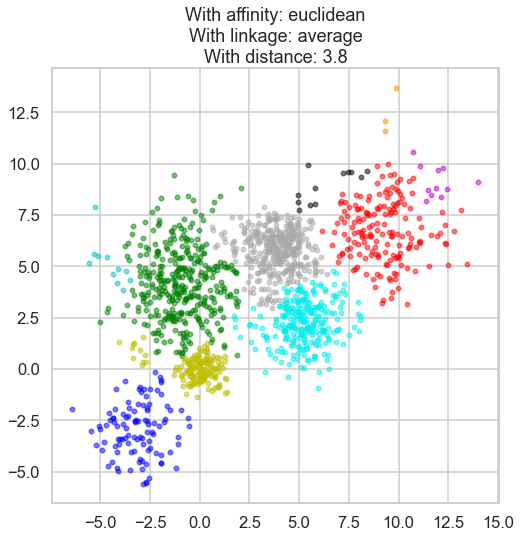

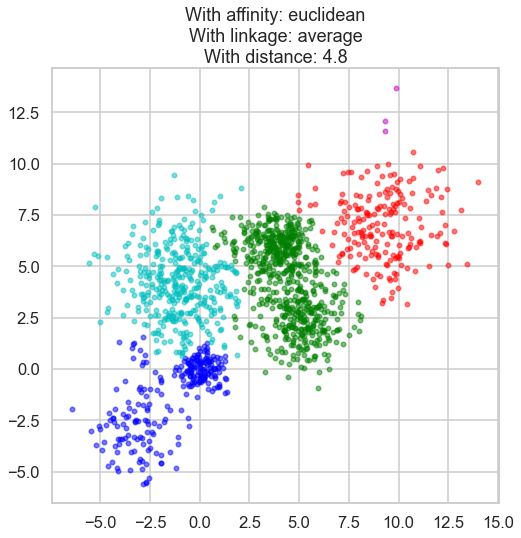

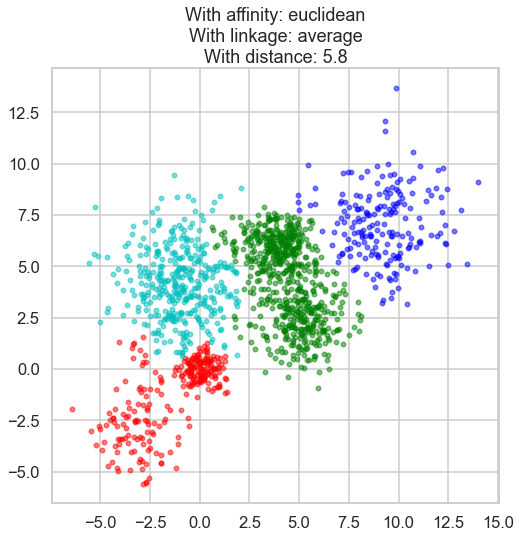

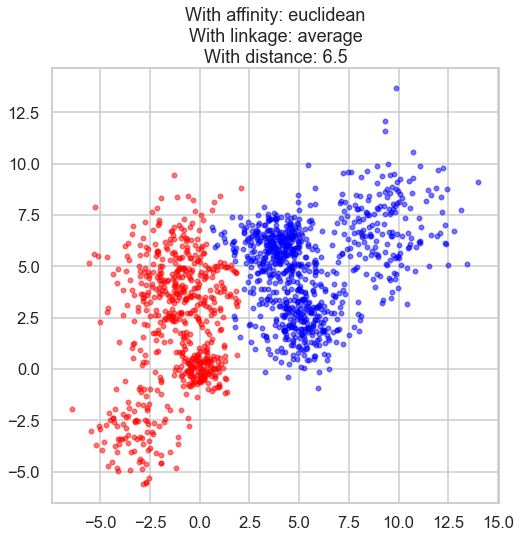

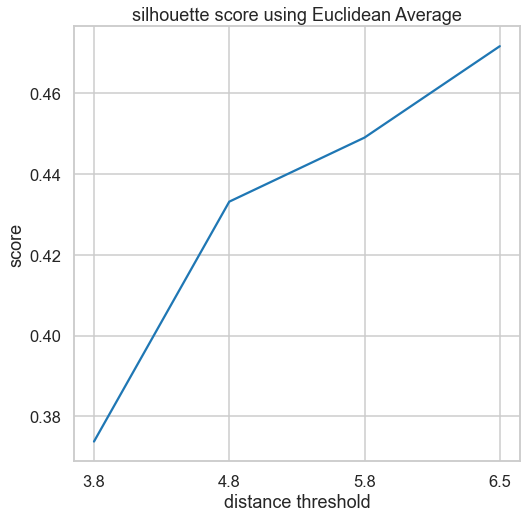

In [41]:
#euclidean and average trials
distance=[3.8,4.8,5.8,6.5]
silhouette_hier={}
for d in distance:
    labels=HierClustering(Multi_blob_Data,"euclidean","average",d)
    key= str(d)
    silhouette_hier[key]=silhouette_score(Multi_blob_Data, labels, metric='euclidean')
    
myList = silhouette_hier.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
s= "silhouette score using Euclidean Average"
plt.title(s)
plt.xlabel("distance threshold")
plt.ylabel("score")
plt.show()

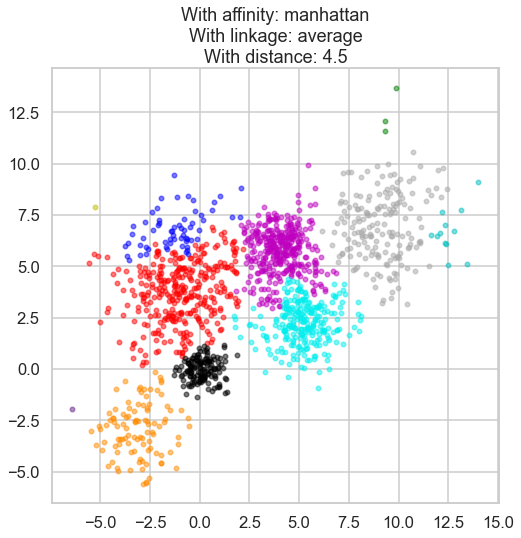

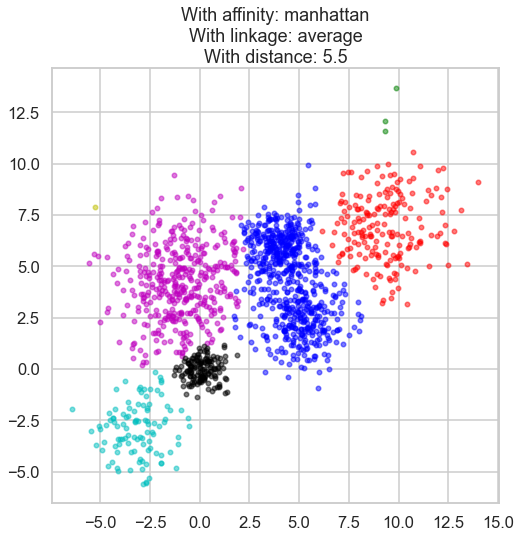

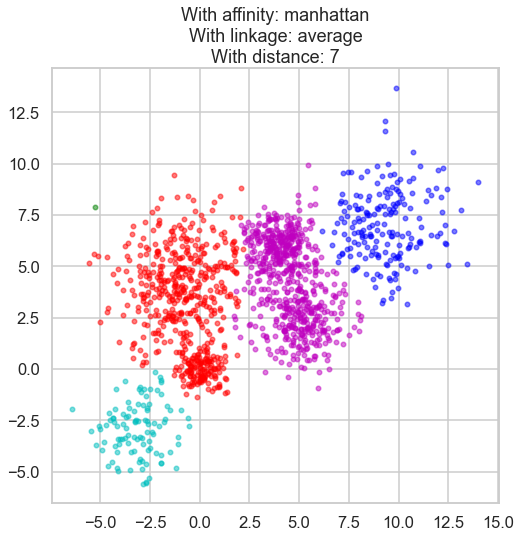

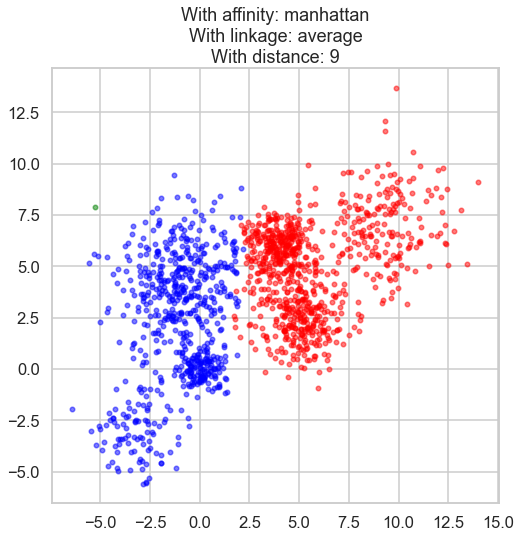

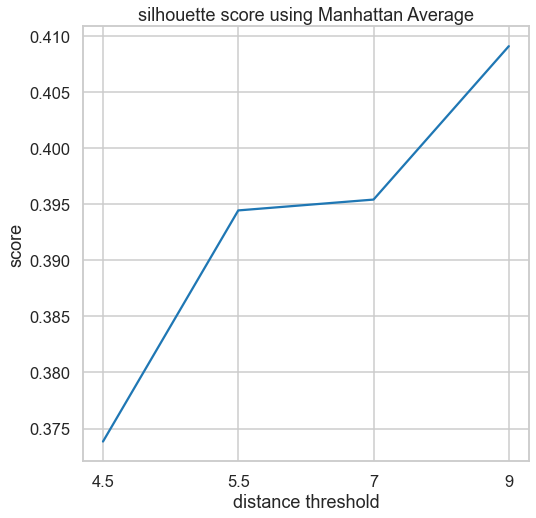

In [43]:
#manhattan and average trials
distance=[4.5,5.5,7,9]
silhouette_hier={}
for d in distance:
    labels=HierClustering(Multi_blob_Data,"manhattan","average",d)
    key= str(d)
    silhouette_hier[key]=silhouette_score(Multi_blob_Data, labels, metric='euclidean')
    
myList = silhouette_hier.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
s= "silhouette score using Manhattan Average"
plt.title(s)
plt.xlabel("distance threshold")
plt.ylabel("score")
plt.show()

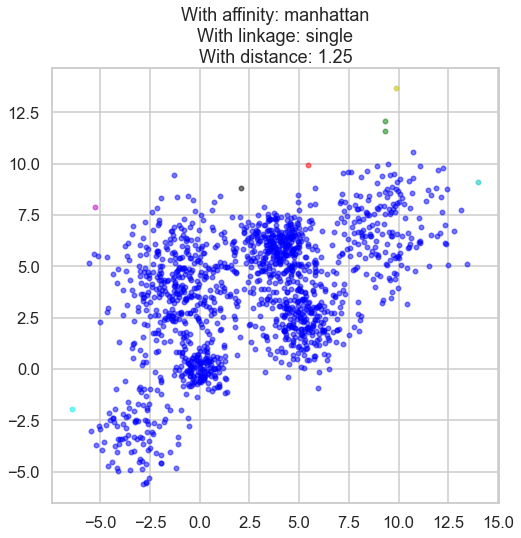

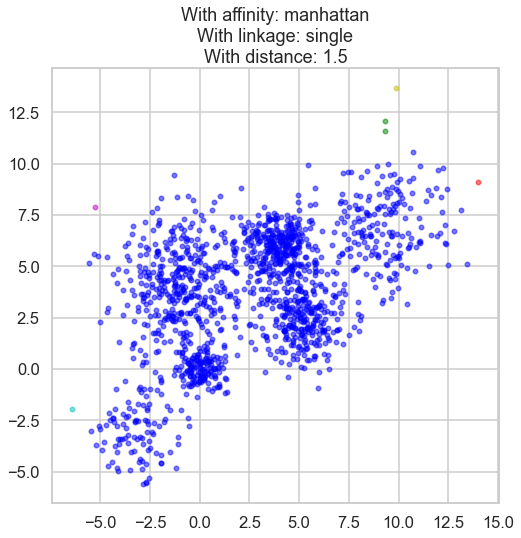

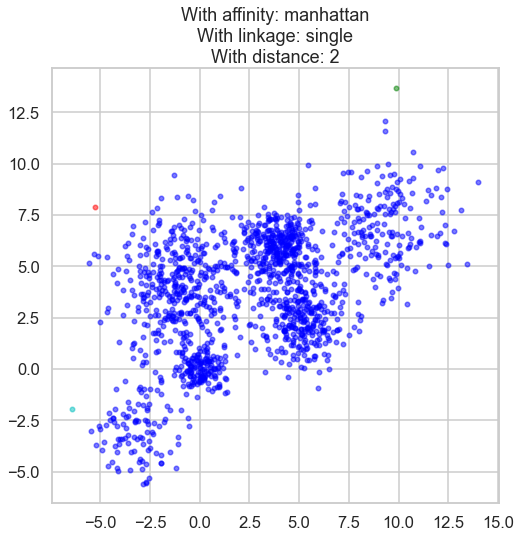

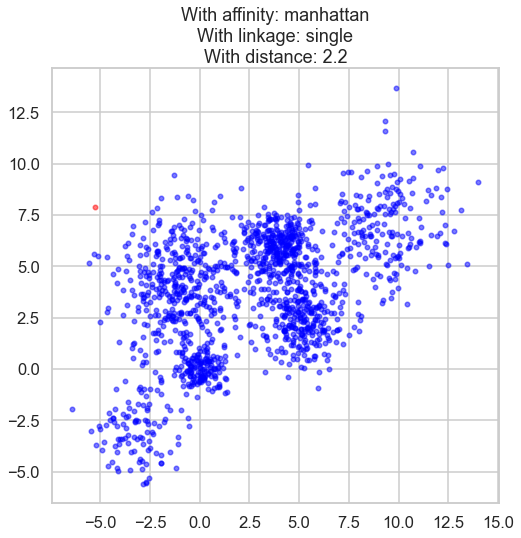

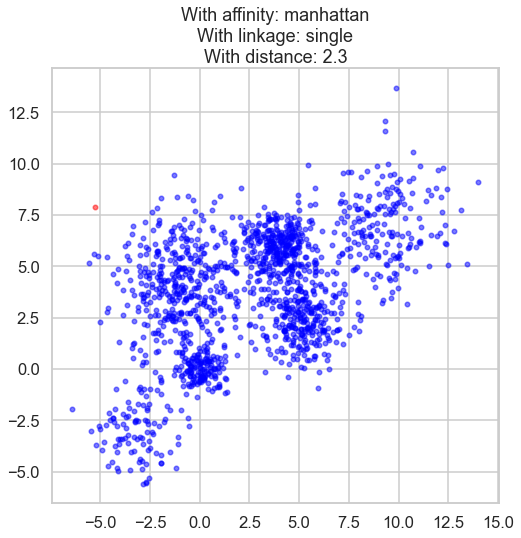

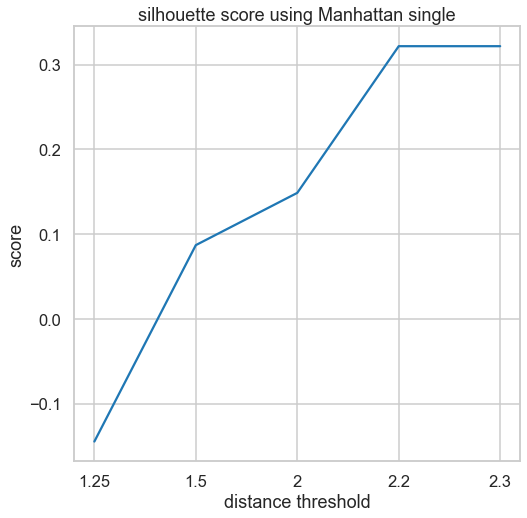

In [48]:
#manhattan and single trials
distance=[1.25,1.5,2,2.2,2.3]
silhouette_hier={}
for d in distance:
    labels=HierClustering(Multi_blob_Data,"manhattan","single",d)
    key= str(d)
    silhouette_hier[key]=silhouette_score(Multi_blob_Data, labels, metric='euclidean')
    
myList = silhouette_hier.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
s= "silhouette score using Manhattan single"
plt.title(s)
plt.xlabel("distance threshold")
plt.ylabel("score")
plt.show()

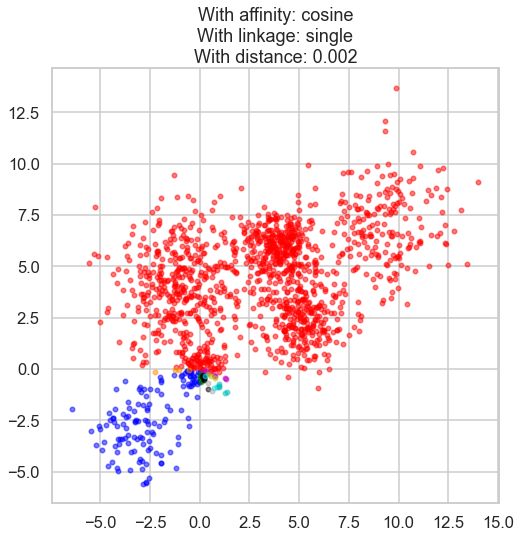

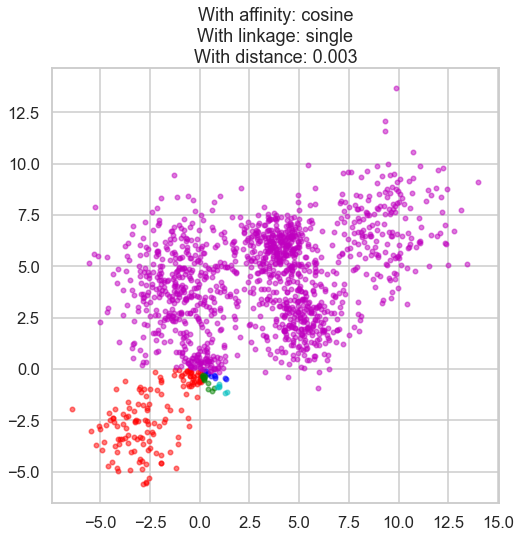

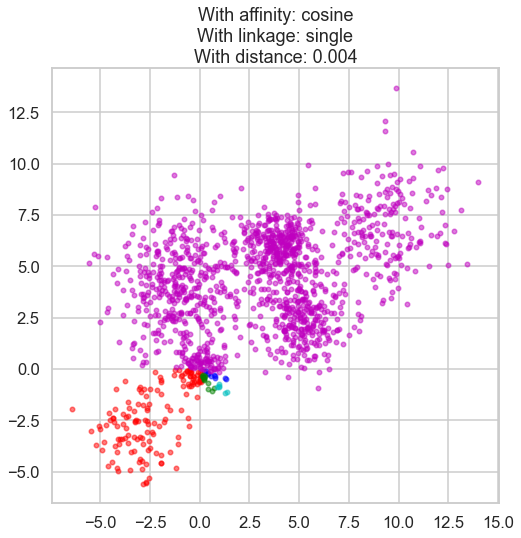

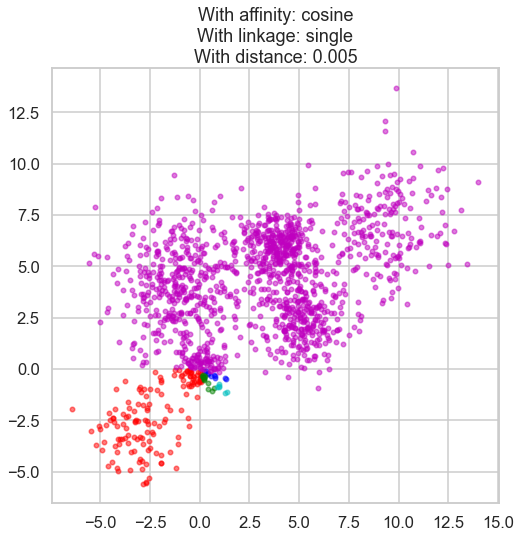

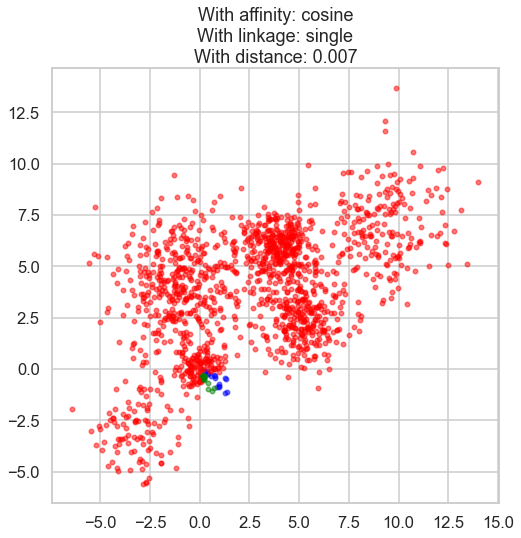

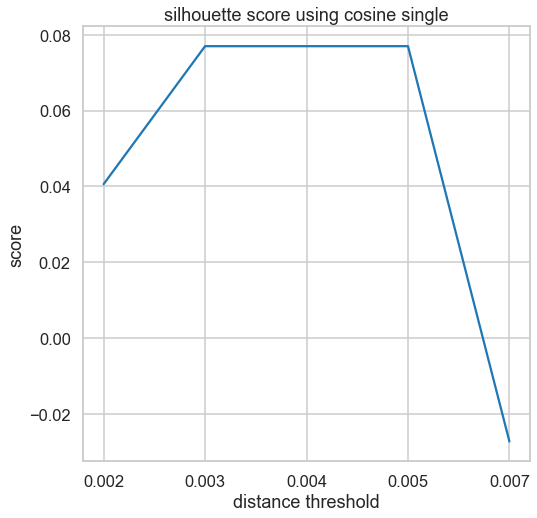

In [54]:
#cosine and single trials
distance=[0.002,0.003,0.004,0.005,0.007]
silhouette_hier={}
for d in distance:
    labels=HierClustering(Multi_blob_Data,"cosine","single",d)
    key= str(d)
    silhouette_hier[key]=silhouette_score(Multi_blob_Data, labels, metric='euclidean')
    
myList = silhouette_hier.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
s= "silhouette score using cosine single"
plt.title(s)
plt.xlabel("distance threshold")
plt.ylabel("score")
plt.show()

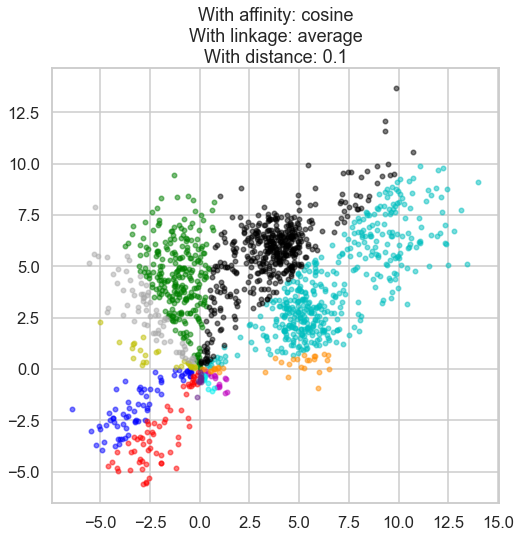

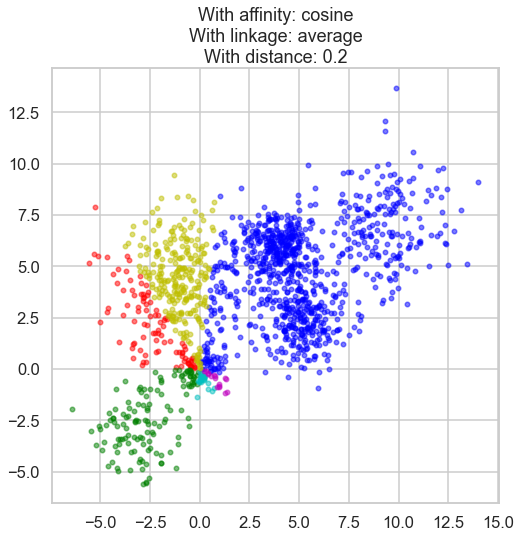

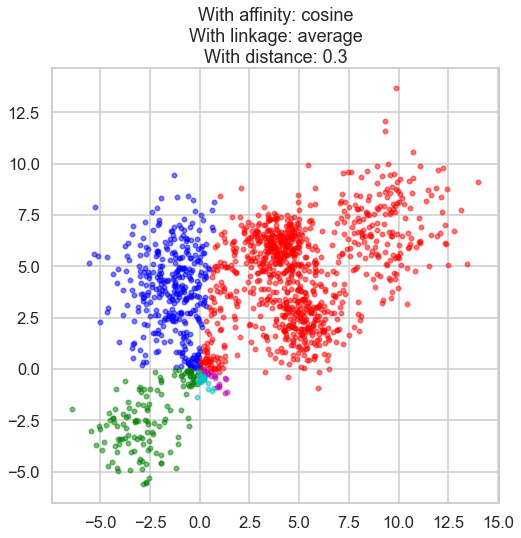

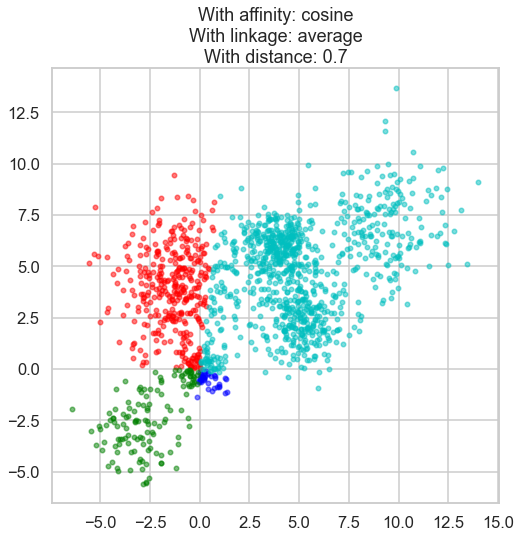

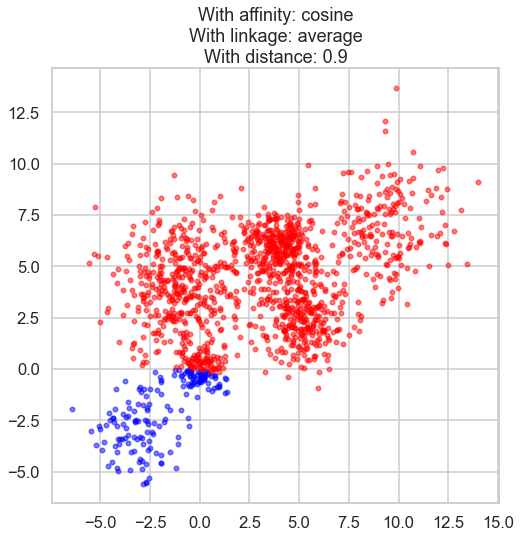

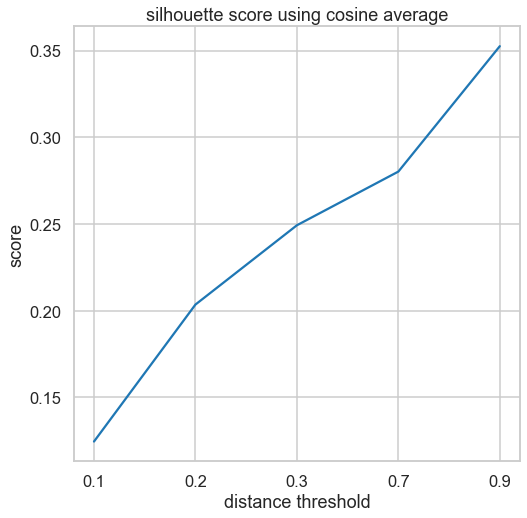

In [55]:
#cosine and average trials
distance=[0.1,0.2,0.3,0.7,0.9]
silhouette_hier={}
for d in distance:
    labels=HierClustering(Multi_blob_Data,"cosine","average",d)
    key= str(d)
    silhouette_hier[key]=silhouette_score(Multi_blob_Data, labels, metric='euclidean')
    
myList = silhouette_hier.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
s= "silhouette score using cosine average"
plt.title(s)
plt.xlabel("distance threshold")
plt.ylabel("score")
plt.show()

# best scores are Euclidean Average with distance 6.5 and Silhouette Score 0.47
# then comes Manhattan Average with distance 9 and Silhouette score 0.408

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

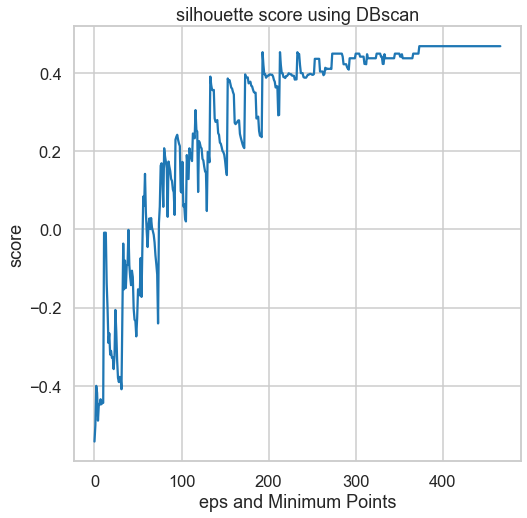

<Figure size 360x288 with 0 Axes>

Text(40.5, 0.5, 'epsilons')

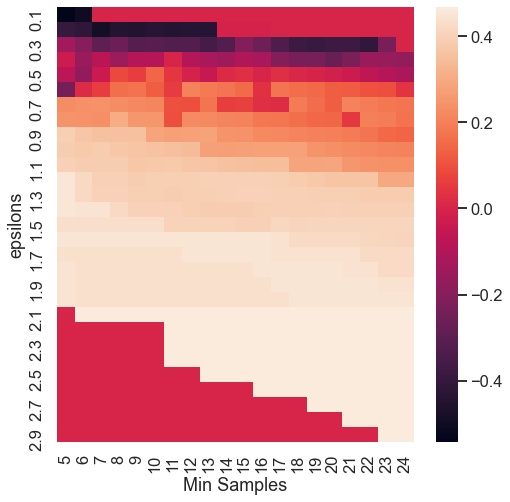

In [54]:
import seaborn as sns
from sklearn.cluster import DBSCAN
def ClusterDB(data,eps,mini):
    dbscan_cluster = DBSCAN(eps=eps, min_samples=mini).fit(data)
    plt.scatter(data[:, 0], 
    data[:, 1], 
    c=dbscan_cluster.labels_, 
    label=y,alpha = 0.5,s = 20)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    return dbscan_cluster.labels_
silhouette_DB={}
keys=[]
i=0
MaxSilhouette=0
Silhouette_matrix=np.zeros([len(np.arange(0.1,3,0.1)),len(range(5,25,1))])
MaxSilhouetteName=""
epsCount=0
epsilon=np.arange(0.1,3,0.2)
Minsamples=range(5,25,1)
for eps in np.arange(0.1,3,0.1):
    miniCount=0
    for mini in range(5,25,1):
        labels=DBSCAN(eps=eps, min_samples=mini).fit(Multi_blob_Data).labels_
        if(len(set(labels))>1):
            key="eps "+str(eps)+"-Min "+str(mini)
            keys.append(key)
           # N_clus=len(set(dbscan_cluster.labels_))
           # labels= [N_clus-1 if item == -1 else item for item in labels]
            k=silhouette_score(Multi_blob_Data, labels, metric='euclidean')
            Silhouette_matrix[epsCount][miniCount]=k
            silhouette_DB[i]=k
            if(k>MaxSilhouette):
                MaxSilhouette=k
                MaxSilhouetteName=key
            i+=1
        miniCount+=1
    epsCount+=1       
        
        
myList = silhouette_DB.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
s= "silhouette score using DBscan"
plt.title(s)
plt.xlabel("eps and Minimum Points")
plt.ylabel("score")
plt.figure(figsize=(5,4))
plt.show()

g= sns.heatmap(Silhouette_matrix)
g.set_xticklabels(Minsamples)
g.set_yticklabels([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9])
g.set_xlabel("Min Samples")
g.set_ylabel("epsilons")

#print(keys)
# dbscan_cluster = DBSCAN(eps=0.4, min_samples=5).fit(Multi_blob_Data)
# plt.scatter(Multi_blob_Data[:, 0], 
# Multi_blob_Data[:, 1], 
# c=dbscan_cluster.labels_, 
# label=y,alpha = 0.5,s = 20)
# plt.xlabel("$x_1$")
# plt.ylabel("$x_2$")
# N_clus=len(set(dbscan_cluster.labels_))
# labels=dbscan_cluster.labels_
# print(N_clus)
# labels= [N_clus-1 if item == -1 else item for item in labels]
# #print(labels)
# display_cluster(Multi_blob_Data,labels,N_clus)

In [131]:
print("configuration with highest silhouette score: "+ MaxSilhouetteName +"\nWith score: "+str(MaxSilhouette))

configuration with highest silhouette score: eps 2.1-Min 6
With score: 0.4685207355522043


3


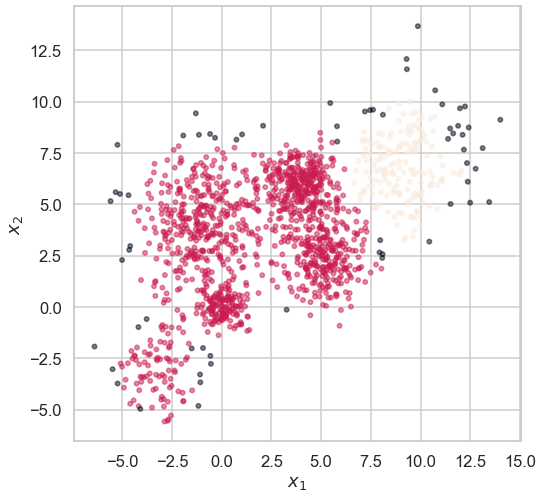

In [136]:
dbscan_cluster = DBSCAN(eps=0.8, min_samples=8).fit(Multi_blob_Data)
plt.scatter(Multi_blob_Data[:, 0], 
Multi_blob_Data[:, 1], 
c=dbscan_cluster.labels_, 
label=y,alpha = 0.5,s = 20)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
print(len(set(dbscan_cluster.labels_)))
plt.show()

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

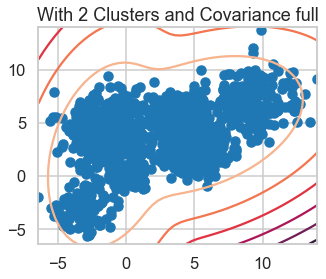

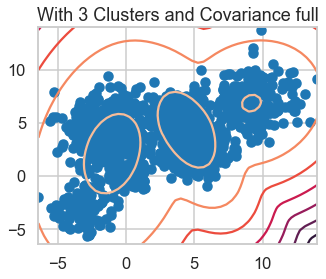

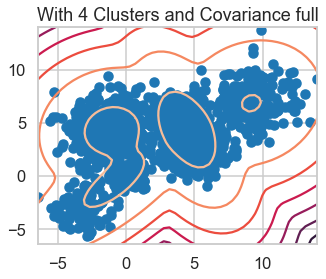

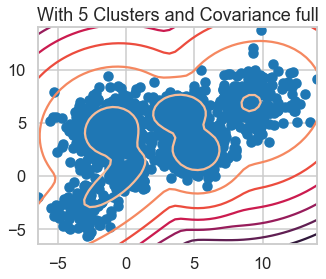

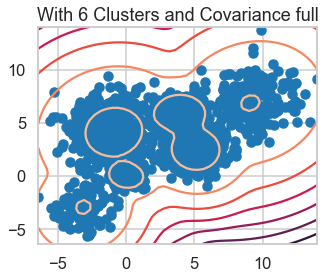

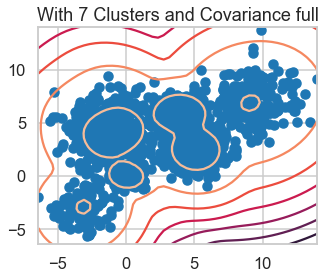

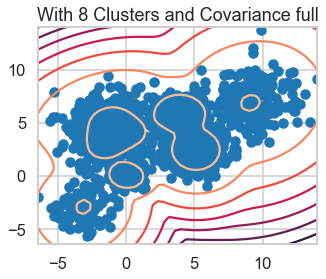

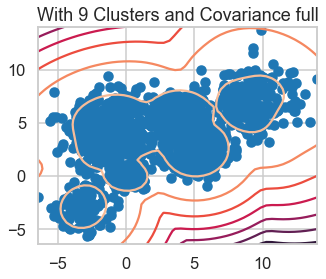

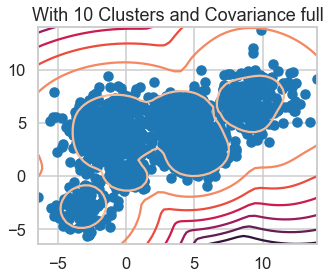

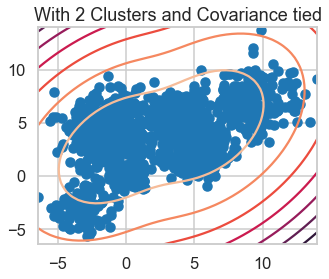

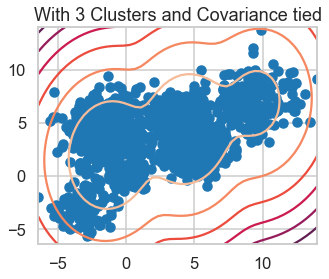

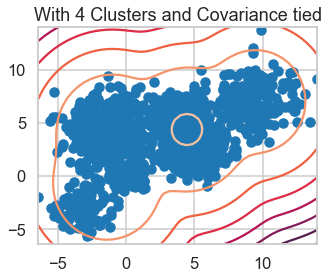

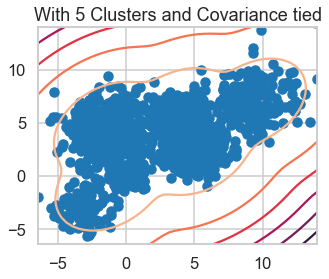

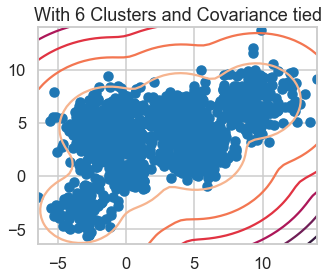

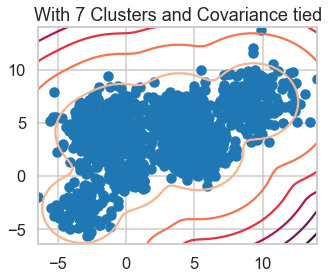

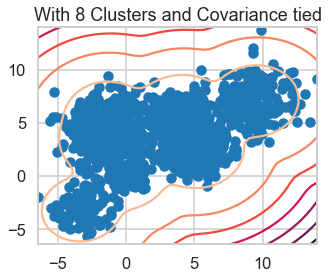

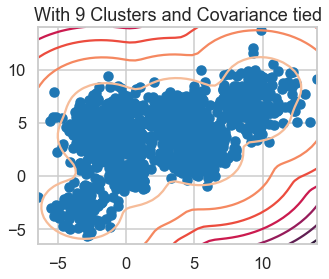

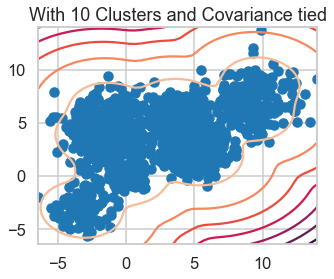

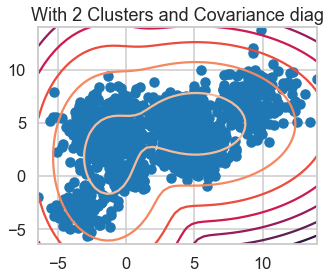

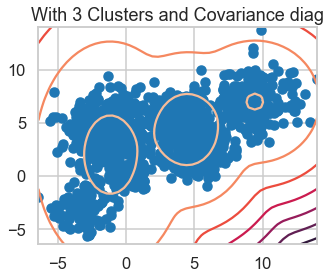

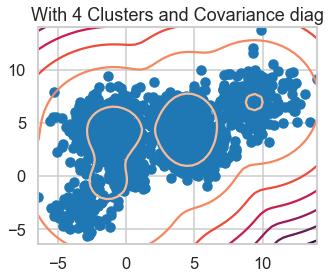

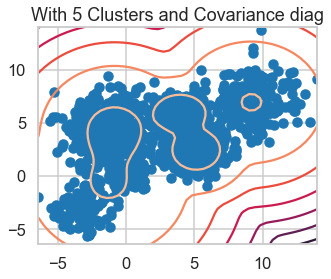

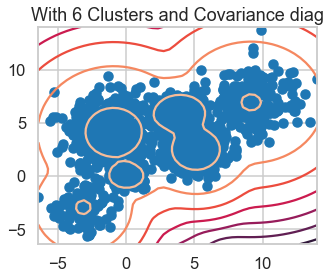

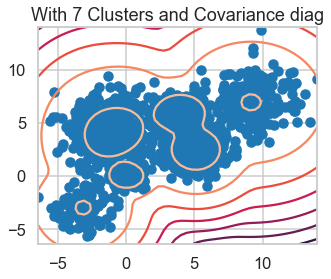

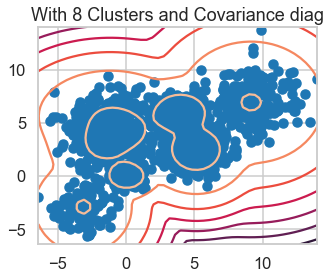

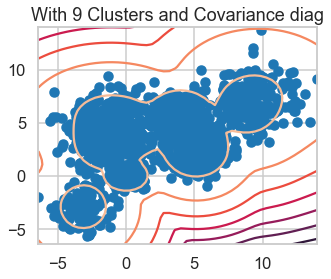

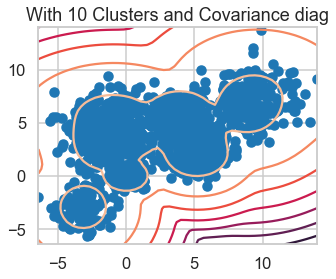

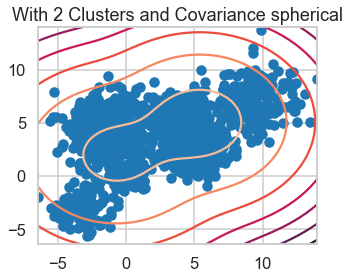

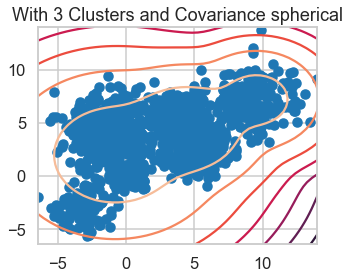

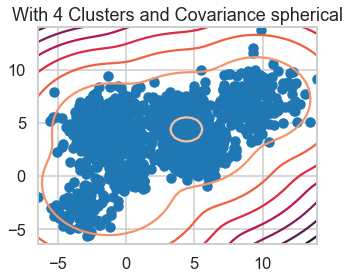

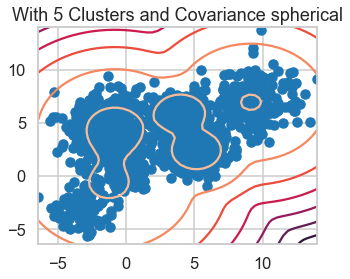

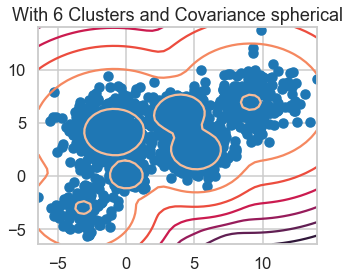

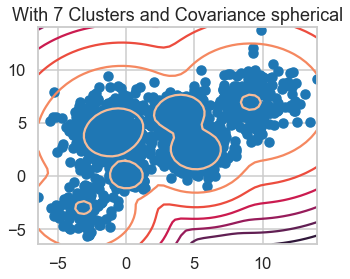

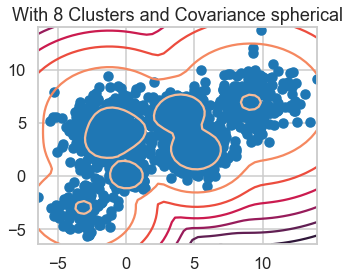

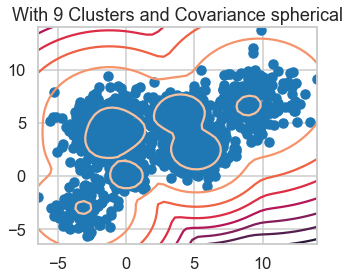

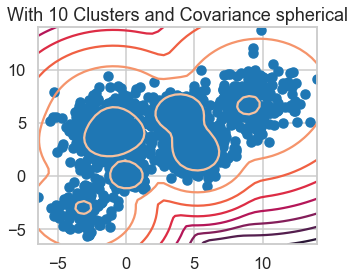

In [31]:
from sklearn.mixture import GaussianMixture

covariance=["full", "tied", "diag", "spherical"]

for cov in covariance:
    for k in range(2,11):
        gm=GaussianMixture(n_components=k,covariance_type=cov, random_state=0).fit(Multi_blob_Data)
        
        
        X, Y = np.meshgrid(np.linspace(min(np.amin(Multi_blob_Data,0)), max(np.amax(Multi_blob_Data,0))), np.linspace(min(np.amin(Multi_blob_Data,1)),max(np.amax(Multi_blob_Data,1))))
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = gm.score_samples(XX)
        Z = Z.reshape((50,50))
        f = plt.figure()
        f.set_figwidth(5)
        f.set_figheight(4)
        plt.contour(X, Y, Z)
        plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1])
        s="With " +str(k)+" Clusters and Covariance "+cov
        plt.title(s)
        plt.show()
        



In [24]:
A=np.array([[1,4],
                [2,5],
                [3,6]])
min(np.amin(A,0))

1

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [58]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [61]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df=pd.DataFrame(iris_data['data'])
scaler.fit(df)
scaled_iris = scaler.transform(df)


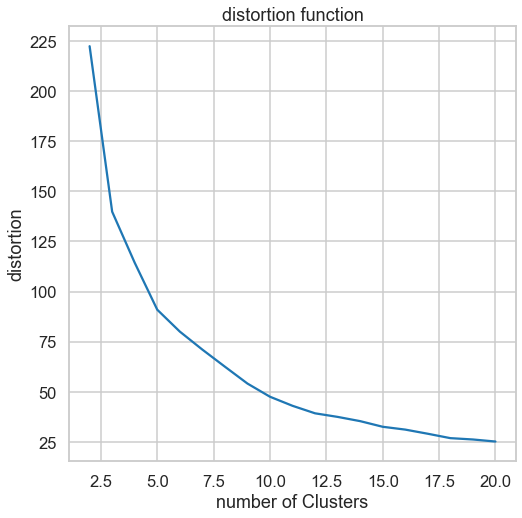

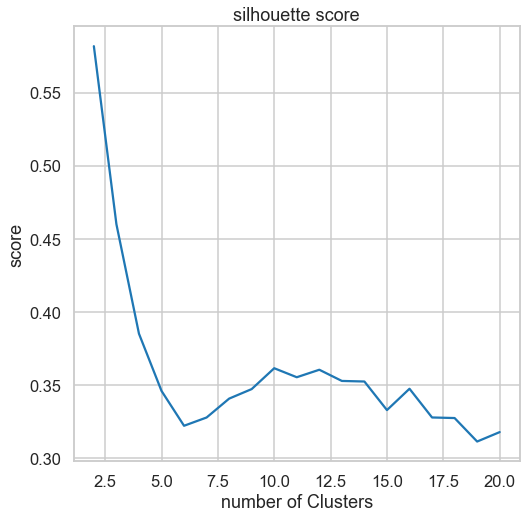

In [70]:
#Kmeans
distortion=[]
silhouette=[]
maxSilhouette=0
bestCluster=0
for i in range(2,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0).fit(scaled_iris)
    distortion.append(kmeans.inertia_)
    k=silhouette_score(scaled_iris, kmeans.labels_, metric='euclidean')
    if k> maxSilhouette:
        maxSilhouette=k
        bestCluster=i
    silhouette.append(k) 
    
plt.plot(range(2,21),distortion)
plt.title('distortion function')
plt.xlabel('number of Clusters')
plt.ylabel('distortion')
plt.show()

plt.plot(range(2,21),silhouette)
plt.title('silhouette score')
plt.xlabel('number of Clusters')
plt.ylabel('score')
plt.show()

In [72]:
print("Cluster with best Silhouette Score using Kmeans: "+str(bestCluster))

Cluster with best Silhouette Score using Kmeans: 2


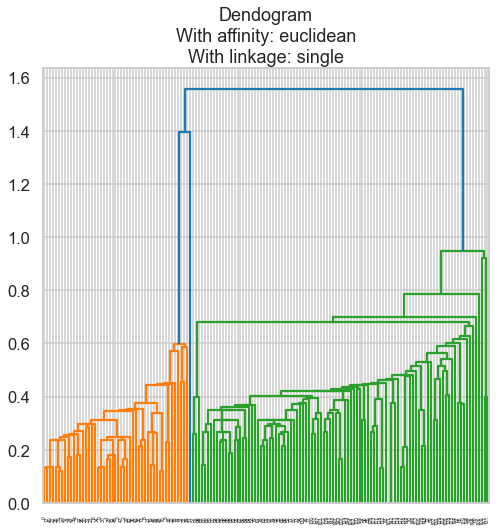

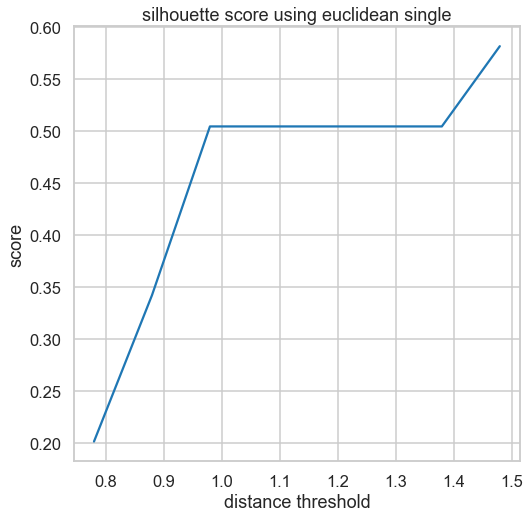

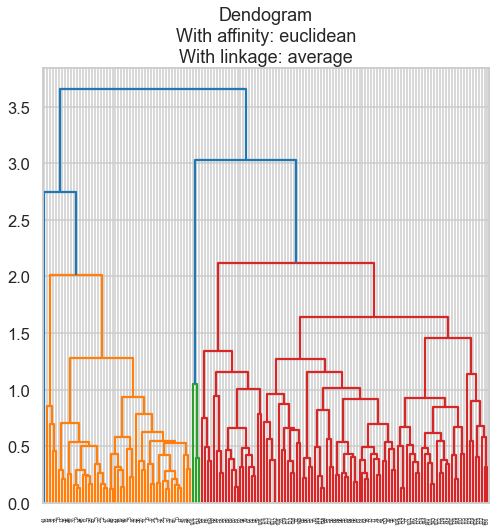

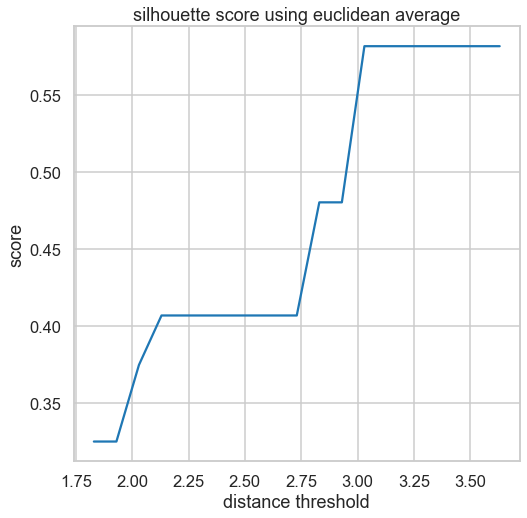

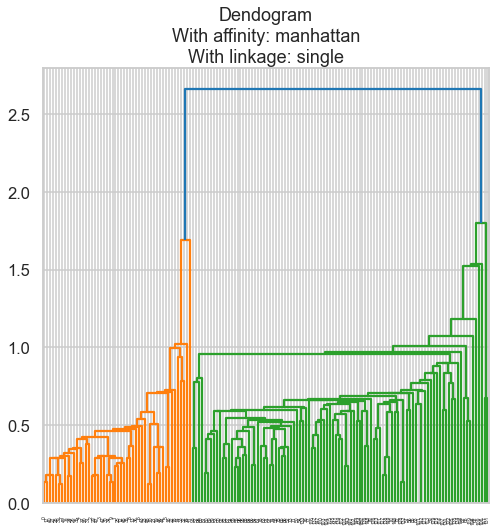

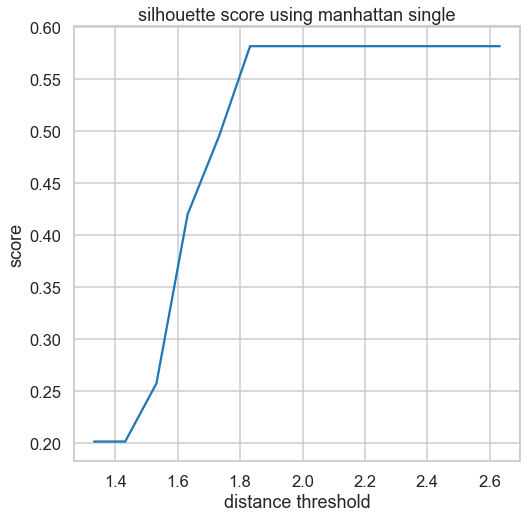

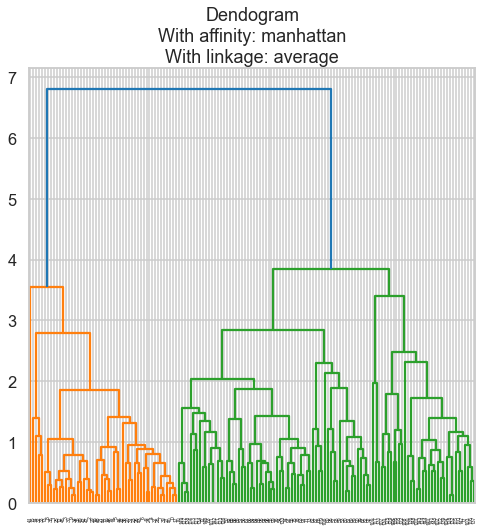

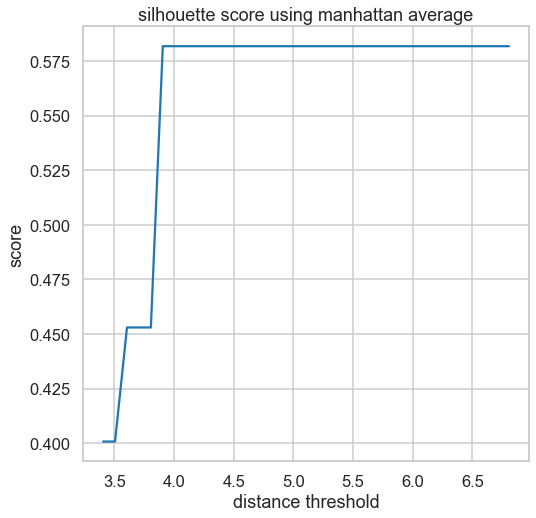

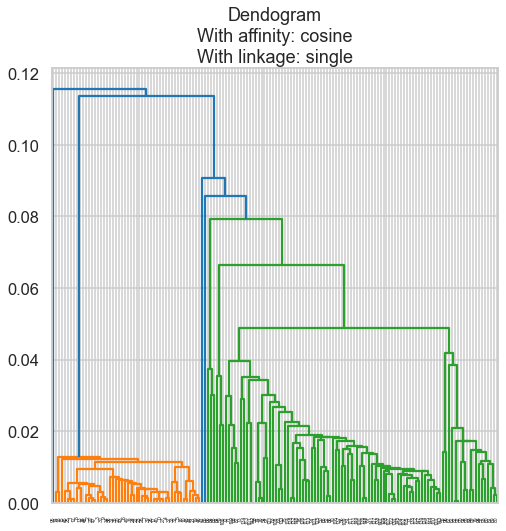

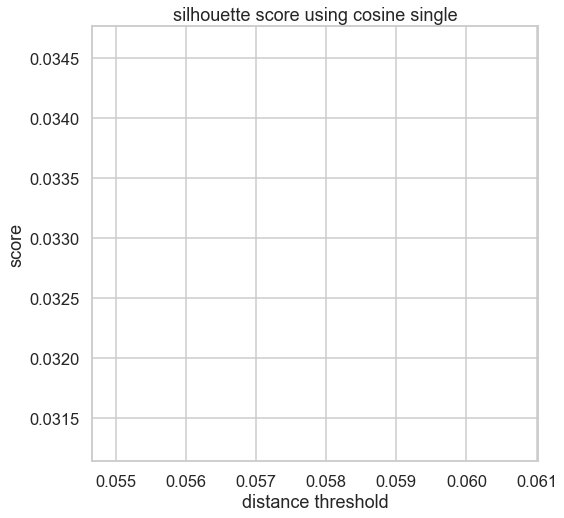

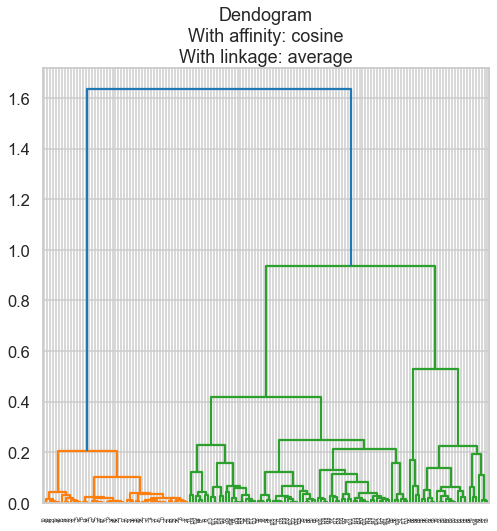

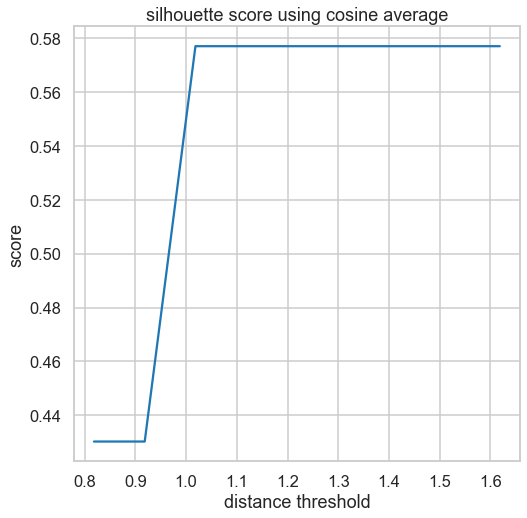

In [79]:
#hiererchal Clustering

affinity=['euclidean','manhattan','cosine']
linkage=['single','average']

silhouette_list=[]
#ploting dendogram
bestParams=""
MaxSilhouette=0
for a in affinity:
    for l in linkage:
        silhouette_list=[]
        distances= dendo_plot(scaled_iris,a,l)
        distances= list(np.arange(max(distances)/2,max(distances),0.1))
        for d in distances:
            labels=HierClustering(scaled_iris,a,l,d)
            k=silhouette_score(scaled_iris, labels, metric='euclidean')
            silhouette_list.append(k)
            if k> MaxSilhouette:
                MaxSilhouette=k
                bestParams= a +" "+l+" "+str(d)
        plt.plot(distances, silhouette_list)
        s= "silhouette score using "+a+" "+l
        plt.title(s)
        plt.xlabel("distance threshold")
        plt.ylabel("score")
        plt.show()
            
            
            

In [82]:
print("best silhouette score in Hiererchal Clustering : "+ str(MaxSilhouette)+" with Params: "+bestParams)

best silhouette score in Hiererchal Clustering : 0.5817500491982808 with Params: euclidean single 1.4792815282065832


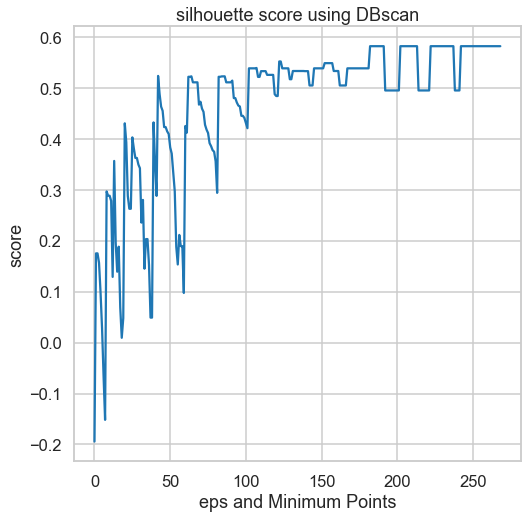

<Figure size 360x288 with 0 Axes>

Text(40.5, 0.5, 'epsilons')

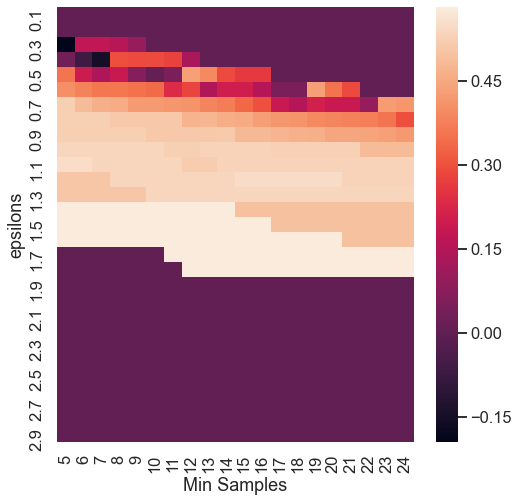

In [84]:
#DBScan Clustering
silhouette_DB={}
keys=[]
i=0
MaxSilhouette=0
Silhouette_matrix=np.zeros([len(np.arange(0.1,3,0.1)),len(range(5,25,1))])
MaxSilhouetteName=""
epsCount=0
epsilon=np.arange(0.1,3,0.2)
Minsamples=range(5,25,1)
for eps in np.arange(0.1,3,0.1):
    miniCount=0
    for mini in range(5,25,1):
        labels=DBSCAN(eps=eps, min_samples=mini).fit(scaled_iris).labels_
        if(len(set(labels))>1):
            key="eps "+str(eps)+"-Min "+str(mini)
            k=silhouette_score(scaled_iris, labels, metric='euclidean')
            Silhouette_matrix[epsCount][miniCount]=k
            silhouette_DB[i]=k
            if(k>MaxSilhouette):
                MaxSilhouette=k
                MaxSilhouetteName=key
            i+=1
        miniCount+=1
    epsCount+=1       

myList = silhouette_DB.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
s= "silhouette score using DBscan"
plt.title(s)
plt.xlabel("eps and Minimum Points")
plt.ylabel("score")
plt.figure(figsize=(5,4))
plt.show()

g= sns.heatmap(Silhouette_matrix)
g.set_xticklabels(Minsamples)
g.set_yticklabels([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9])
g.set_xlabel("Min Samples")
g.set_ylabel("epsilons")


In [85]:
print("best silhouette score in DBScan Clustering : "+ str(MaxSilhouette)+" with Params: "+MaxSilhouetteName)

best silhouette score in DBScan Clustering : 0.5817500491982808 with Params: eps 1.4000000000000001-Min 5


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [86]:
Customer_data_df= pd.read_csv("Customer data.csv")
Customer_data_df.pop('ID')
Customer_data_array= Customer_data_df.to_numpy()
Customer_data_df_2=pd.DataFrame(Customer_data_array)

from sklearn.preprocessing import MaxAbsScaler, StandardScaler, RobustScaler, Normalizer
scaler = RobustScaler()
scaler.fit(Customer_data_df_2)
Customer_data_df_2 = scaler.transform(Customer_data_df_2)
Customer_data_df_2= pd.DataFrame(Customer_data_df_2, columns=Customer_data_df.columns)
Customer_data_df_2.head()

Customer_data_array= Customer_data_df_2.to_numpy()

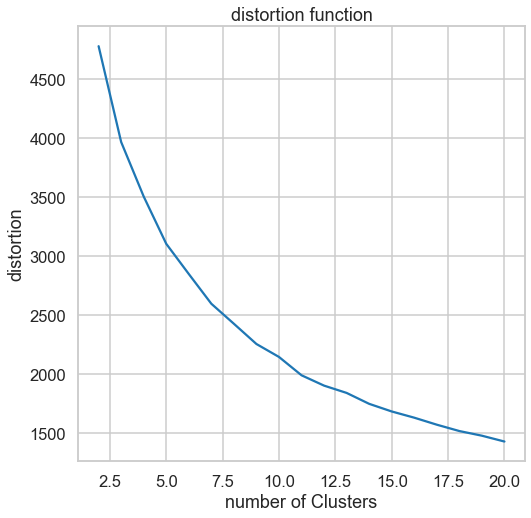

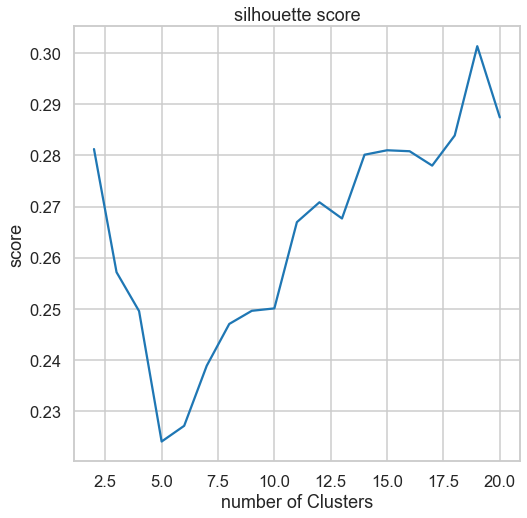

In [87]:
#Kmeans
distortion=[]
silhouette=[]
maxSilhouette=0
bestCluster=0
for i in range(2,21):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0).fit(Customer_data_array)
    distortion.append(kmeans.inertia_)
    k=silhouette_score(Customer_data_array, kmeans.labels_, metric='euclidean')
    if k> maxSilhouette:
        maxSilhouette=k
        bestCluster=i
    silhouette.append(k) 
    
plt.plot(range(2,21),distortion)
plt.title('distortion function')
plt.xlabel('number of Clusters')
plt.ylabel('distortion')
plt.show()

plt.plot(range(2,21),silhouette)
plt.title('silhouette score')
plt.xlabel('number of Clusters')
plt.ylabel('score')
plt.show()

In [88]:
print("Cluster with best Silhouette Score using Kmeans: "+str(bestCluster))

Cluster with best Silhouette Score using Kmeans: 19


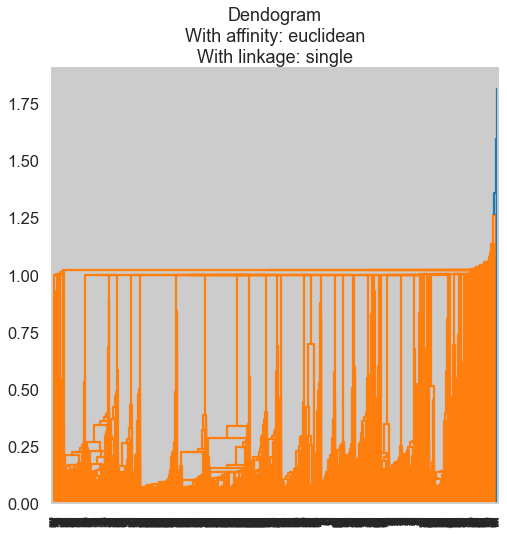

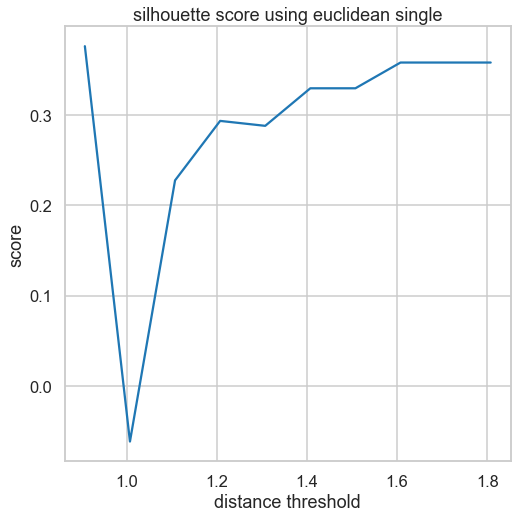

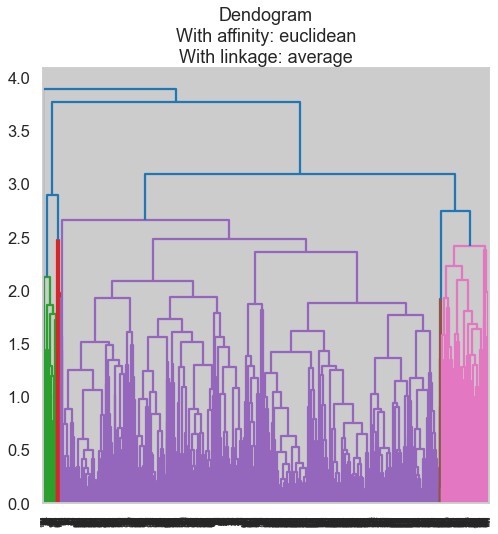

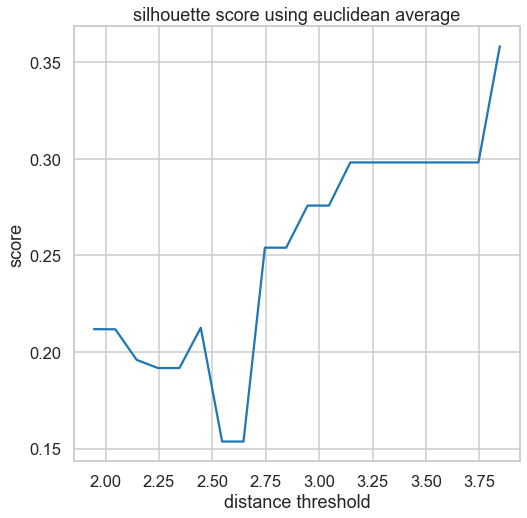

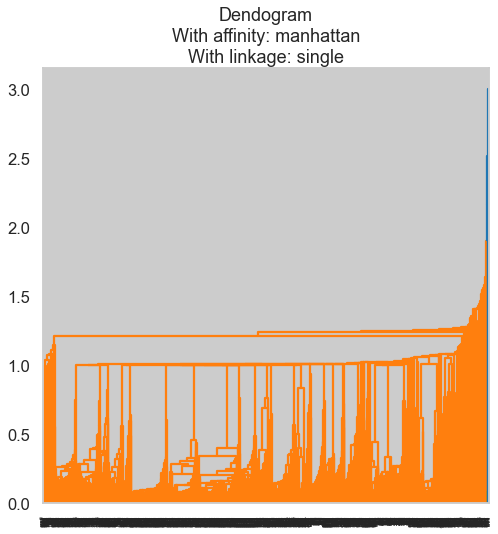

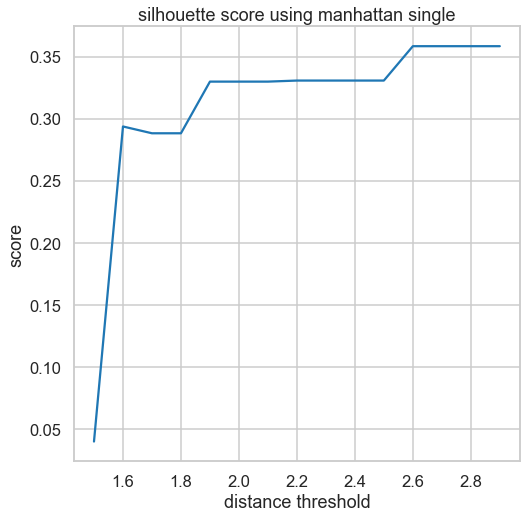

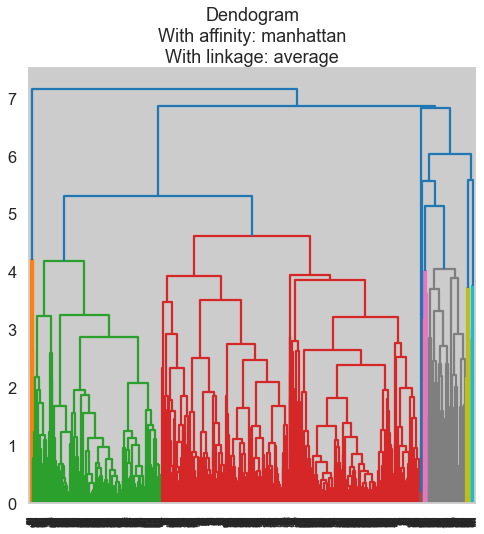

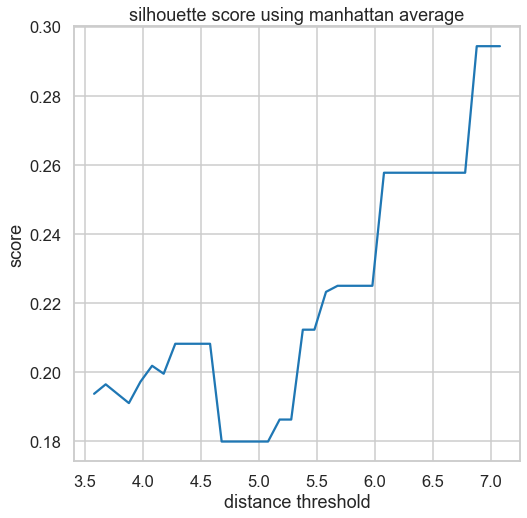

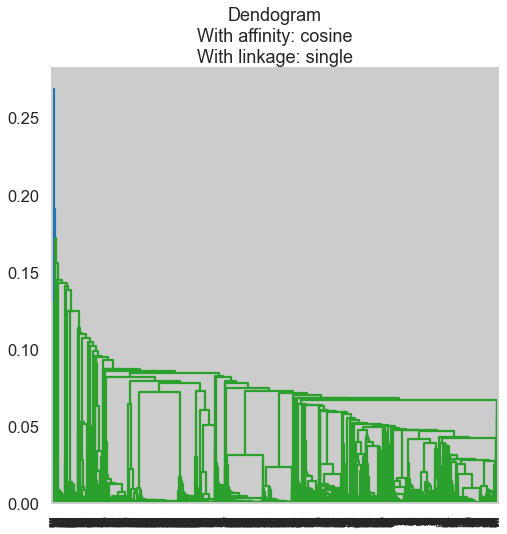

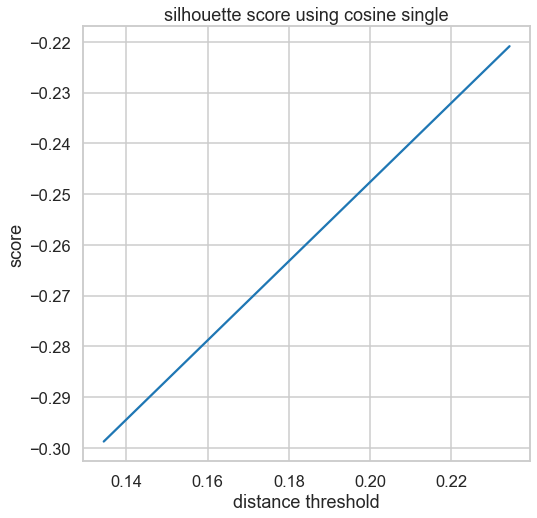

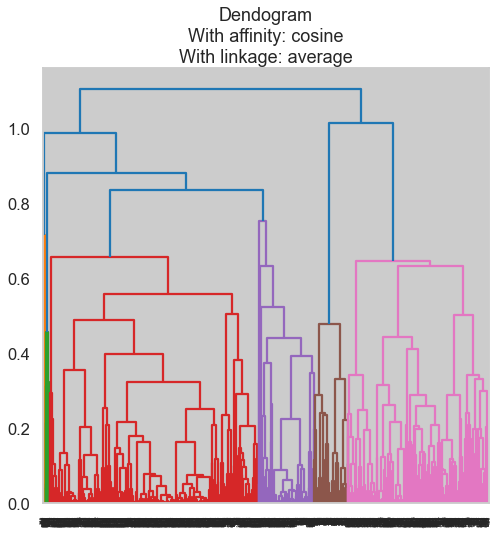

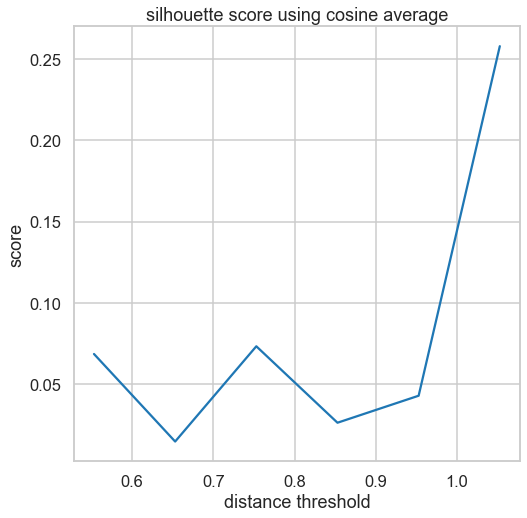

In [90]:
#hiererchal Clustering

affinity=['euclidean','manhattan','cosine']
linkage=['single','average']

silhouette_list=[]
#ploting dendogram
bestParams=""
MaxSilhouette=0
for a in affinity:
    for l in linkage:
        silhouette_list=[]
        distances= dendo_plot(Customer_data_array,a,l)
        distances= list(np.arange(max(distances)/2,max(distances),0.1))
        for d in distances:
            labels=HierClustering(Customer_data_array,a,l,d)
            k=silhouette_score(Customer_data_array, labels, metric='euclidean')
            silhouette_list.append(k)
            if k> MaxSilhouette:
                MaxSilhouette=k
                bestParams= a +" "+l+" "+str(d)
        plt.plot(distances, silhouette_list)
        s= "silhouette score using "+a+" "+l
        plt.title(s)
        plt.xlabel("distance threshold")
        plt.ylabel("score")
        plt.show()
            
      

In [91]:
print("best silhouette score in Hiererchal Clustering : "+ str(MaxSilhouette)+" with Params: "+bestParams)

best silhouette score in Hiererchal Clustering : 0.3764415308278633 with Params: euclidean single 0.9075959111500503


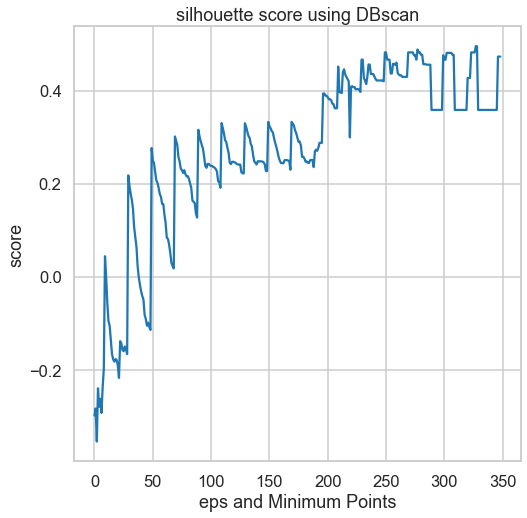

<Figure size 360x288 with 0 Axes>

Text(40.5, 0.5, 'epsilons')

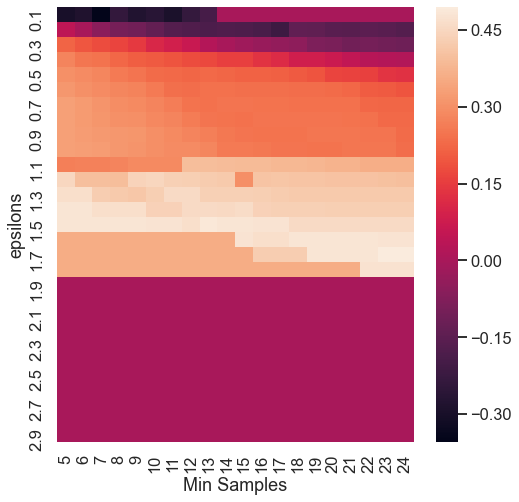

In [92]:
#DBScan Clustering
silhouette_DB={}
keys=[]
i=0
MaxSilhouette=0
Silhouette_matrix=np.zeros([len(np.arange(0.1,3,0.1)),len(range(5,25,1))])
MaxSilhouetteName=""
epsCount=0
epsilon=np.arange(0.1,3,0.2)
Minsamples=range(5,25,1)
for eps in np.arange(0.1,3,0.1):
    miniCount=0
    for mini in range(5,25,1):
        labels=DBSCAN(eps=eps, min_samples=mini).fit(Customer_data_array).labels_
        if(len(set(labels))>1):
            key="eps "+str(eps)+"-Min "+str(mini)
            k=silhouette_score(Customer_data_array, labels, metric='euclidean')
            Silhouette_matrix[epsCount][miniCount]=k
            silhouette_DB[i]=k
            if(k>MaxSilhouette):
                MaxSilhouette=k
                MaxSilhouetteName=key
            i+=1
        miniCount+=1
    epsCount+=1       

myList = silhouette_DB.items()
myList = sorted(myList) 
x, y = zip(*myList) 

plt.plot(x, y)
s= "silhouette score using DBscan"
plt.title(s)
plt.xlabel("eps and Minimum Points")
plt.ylabel("score")
plt.figure(figsize=(5,4))
plt.show()

g= sns.heatmap(Silhouette_matrix)
g.set_xticklabels(Minsamples)
g.set_yticklabels([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5,
       2.7, 2.9])
g.set_xlabel("Min Samples")
g.set_ylabel("epsilons")


In [93]:
print("best silhouette score in DBScan Clustering : "+ str(MaxSilhouette)+" with Params: "+MaxSilhouetteName)

best silhouette score in DBScan Clustering : 0.49530403813264673 with Params: eps 1.7000000000000002-Min 23
